In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# Path to your zip file
zip_path = '/content/drive/MyDrive/AI_project_dataset.zip'
extract_dir = 'AI_project_dataset'  # Folder where all extracted folders will be stored

# Create a main extraction directory
os.makedirs(extract_dir, exist_ok=True)

# Extract each main folder separately
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        # Extract files while preserving folder structure
        zip_ref.extract(file, extract_dir)

print("Extraction complete. Check the folder:", extract_dir)


Extraction complete. Check the folder: AI_project_dataset


In [3]:
# Importing necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [5]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [6]:
dataset = torchvision.datasets.ImageFolder(root='/content/AI_project_dataset/RSI-CB/RSI-CB256/', transform=data_transforms)

In [7]:
train_size = int(0.7 * len(dataset))
valid_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

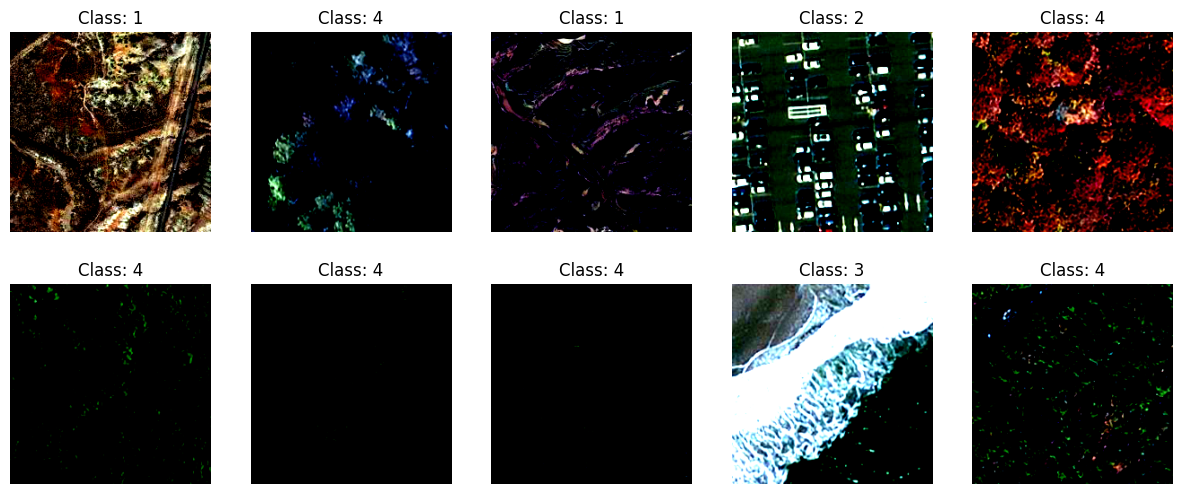

In [8]:
# Generate a random sample of 10 images from the test dataset
sample_loader = torch.utils.data.DataLoader(test_dataset, batch_size=10, shuffle=True)
sample_iter = iter(sample_loader)
sample_images, sample_labels = next(sample_iter)

# Display the sample images
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].permute(1, 2, 0))  # Transpose the tensor to (H, W, C) for display
    plt.title(f"Class: {sample_labels[i]}")
    plt.axis('off')
plt.show()


In [10]:
batch_size_range = [32, 64, 120]
learning_rate_range = [0.001, 0.01, 0.005, 0.0001, 0.00001]
num_epochs = 40

Training with batch size: 32, learning rate: 0.001, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.136955752613229, Accuracy: 55.59%, Validation Loss: 0.9947562177072872, Validation Accuracy: 60.30%, Running time: 116.78782248497009
Epoch 2, Loss: 0.7947228089976983, Accuracy: 69.85%, Validation Loss: 0.6030989034157811, Validation Accuracy: 76.98%, Running time: 82.63311386108398
Epoch 3, Loss: 0.6541348710623842, Accuracy: 75.52%, Validation Loss: 0.5971517111315872, Validation Accuracy: 76.76%, Running time: 75.59793257713318
Epoch 4, Loss: 0.6739036335151263, Accuracy: 75.62%, Validation Loss: 0.6593329430078015, Validation Accuracy: 73.20%, Running time: 74.64403033256531
Epoch 5, Loss: 0.5956071907100864, Accuracy: 77.31%, Validation Loss: 0.6976514307386947, Validation Accuracy: 76.67%, Running time: 74.41512799263
Epoch 6, Loss: 0.5739074858176217, Accuracy: 78.80%, Validation Loss: 0.515357227939548, Validation Accuracy: 79.90%, Running time: 75.179044008255
Epoch 7, Loss: 0.4679906919049079, Accuracy: 82.13%, Validation Loss: 0.43387335403399035, Validatio

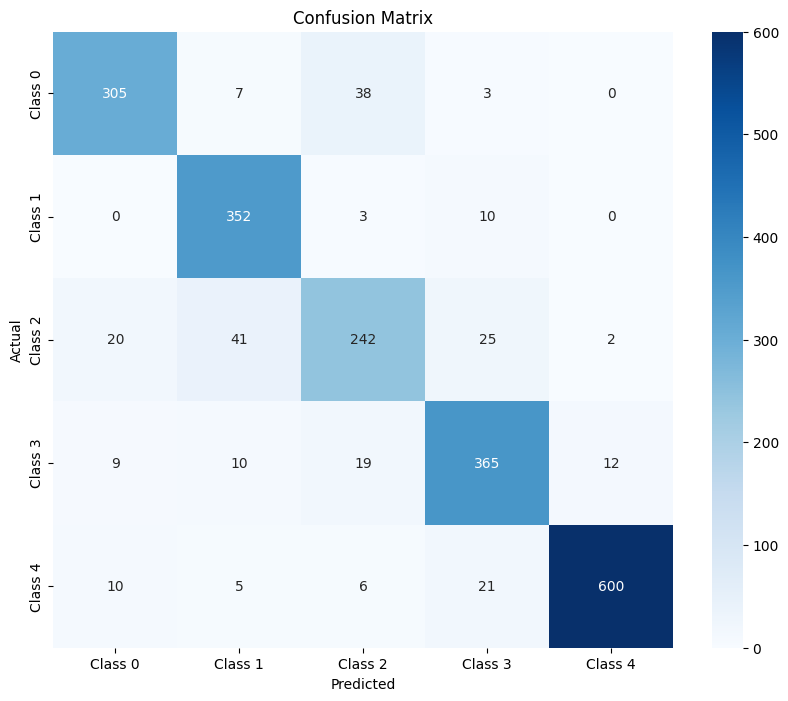

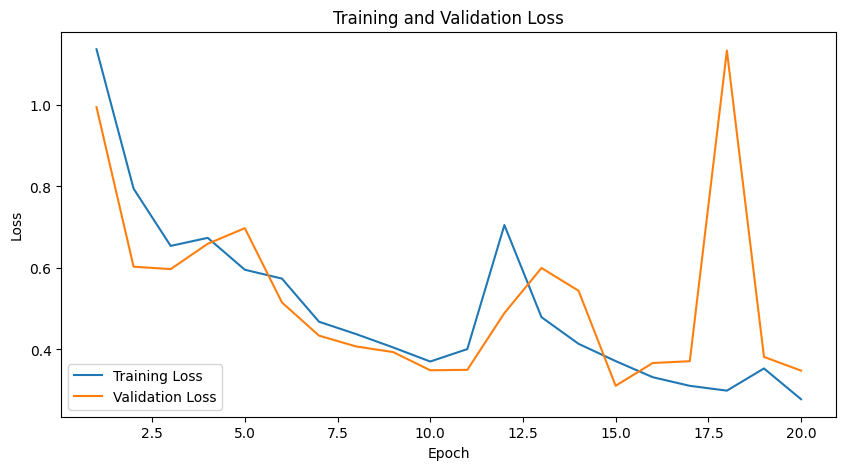

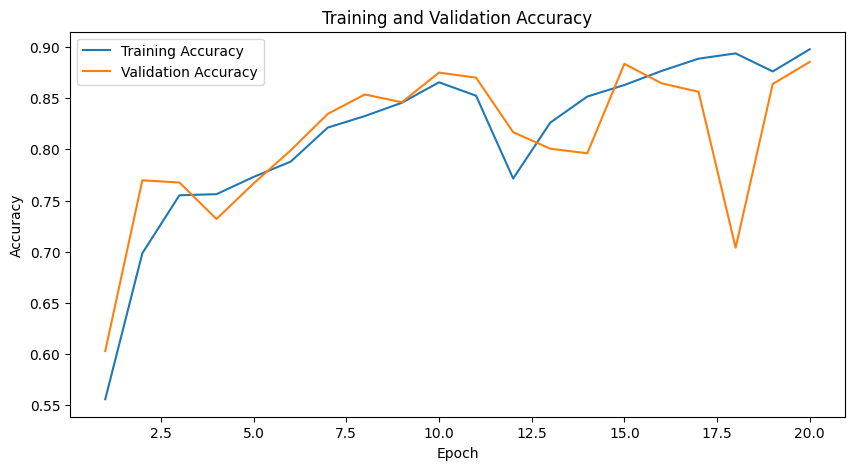


Training with batch size: 32, learning rate: 0.01, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 3725.1885212308157, Accuracy: 27.24%, Validation Loss: 1.5853575684807517, Validation Accuracy: 29.18%, Running time: 76.92656588554382
Epoch 2, Loss: 1.5822158172694307, Accuracy: 29.71%, Validation Loss: 1.5838956607110573, Validation Accuracy: 29.18%, Running time: 74.79725861549377
Epoch 3, Loss: 1.5813472027892403, Accuracy: 29.79%, Validation Loss: 1.583959086374803, Validation Accuracy: 29.18%, Running time: 75.26839995384216
Epoch 4, Loss: 1.5809181364911755, Accuracy: 29.79%, Validation Loss: 1.5842660719698125, Validation Accuracy: 29.18%, Running time: 75.02277827262878
Epoch 5, Loss: 1.5813266649163467, Accuracy: 29.79%, Validation Loss: 1.5853667484991478, Validation Accuracy: 29.18%, Running time: 74.72257566452026
Epoch 6, Loss: 1.5808660288436294, Accuracy: 29.79%, Validation Loss: 1.5856110480698673, Validation Accuracy: 29.18%, Running time: 75.98159527778625
Epoch 7, Loss: 1.5811624816596637, Accuracy: 29.79%, Validation Loss: 1.5842288425474456, Valid

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Batch Size: 32, Learning Rate: 0.01, Epochs: 40
Accuracy: 0.3049881235154394
Precision: 0.06099762470308788
Recall: 0.2
F1 Score: 0.09348380050964689

Confusion Matrix:


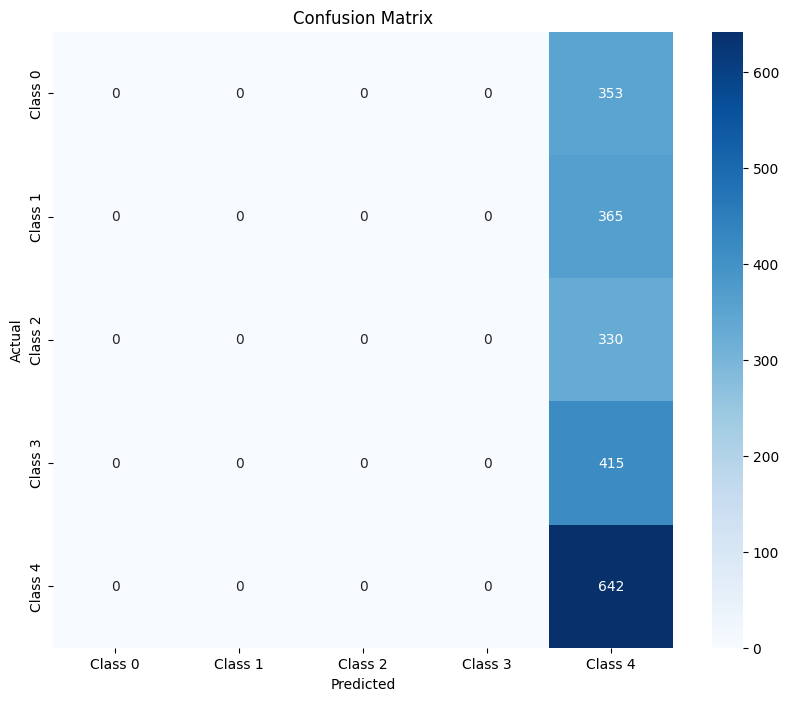

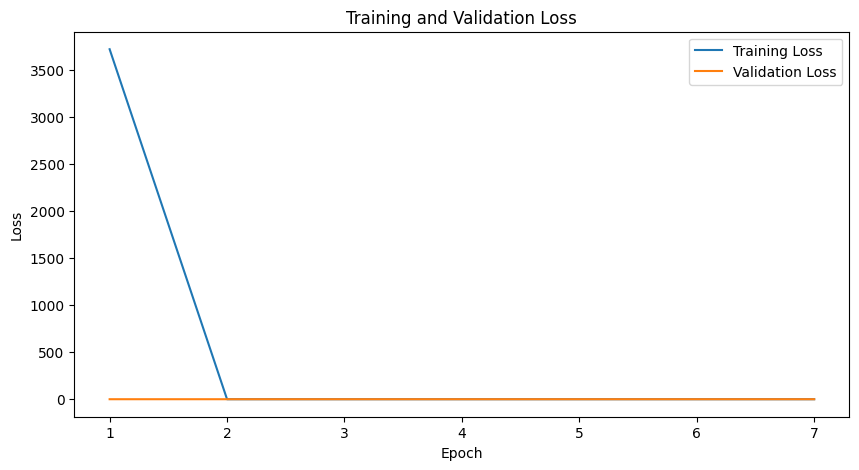

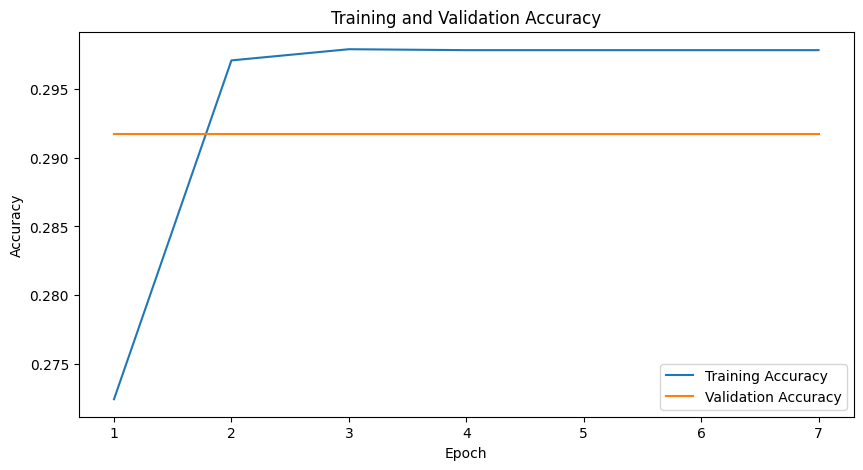


Training with batch size: 32, learning rate: 0.005, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 115.1079689005709, Accuracy: 36.61%, Validation Loss: 1.585803730018211, Validation Accuracy: 29.18%, Running time: 75.5549168586731
Epoch 2, Loss: 1.5846106812131637, Accuracy: 29.78%, Validation Loss: 1.5843374783342534, Validation Accuracy: 29.18%, Running time: 74.6943895816803
Epoch 3, Loss: 1.5852034991837376, Accuracy: 29.64%, Validation Loss: 1.585512857545506, Validation Accuracy: 29.18%, Running time: 74.60808992385864
Epoch 4, Loss: 1.581863022678069, Accuracy: 29.79%, Validation Loss: 1.5844319011225845, Validation Accuracy: 29.18%, Running time: 75.1853392124176
Epoch 5, Loss: 1.581020640189115, Accuracy: 29.79%, Validation Loss: 1.5840928834496122, Validation Accuracy: 29.18%, Running time: 74.26352572441101
Epoch 6, Loss: 1.5814655522720933, Accuracy: 29.78%, Validation Loss: 1.5846728673486998, Validation Accuracy: 29.18%, Running time: 75.56333827972412
Epoch 7, Loss: 1.5812594546671803, Accuracy: 29.79%, Validation Loss: 1.5837627351284027, Validation A

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Batch Size: 32, Learning Rate: 0.005, Epochs: 40
Accuracy: 0.3049881235154394
Precision: 0.06099762470308788
Recall: 0.2
F1 Score: 0.09348380050964689

Confusion Matrix:


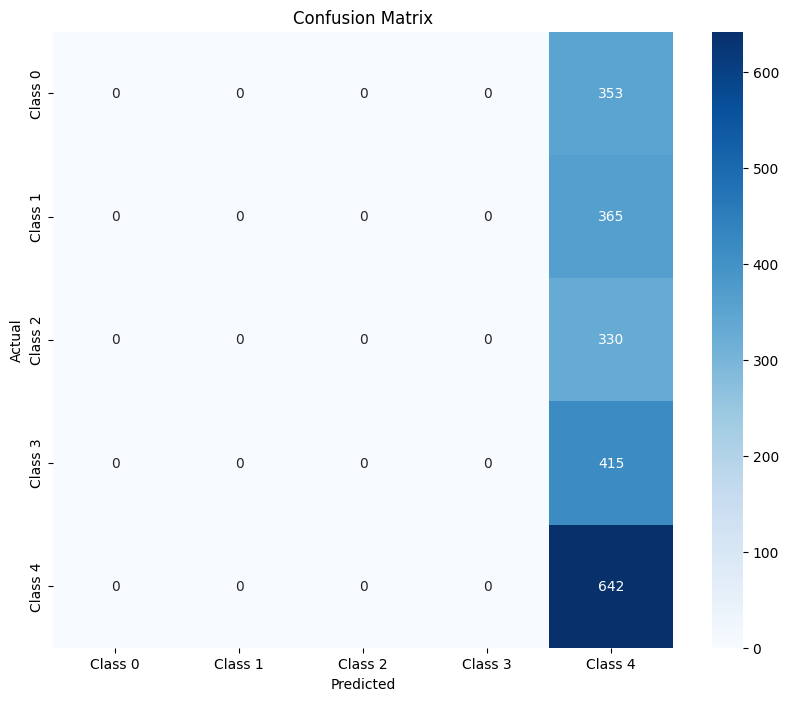

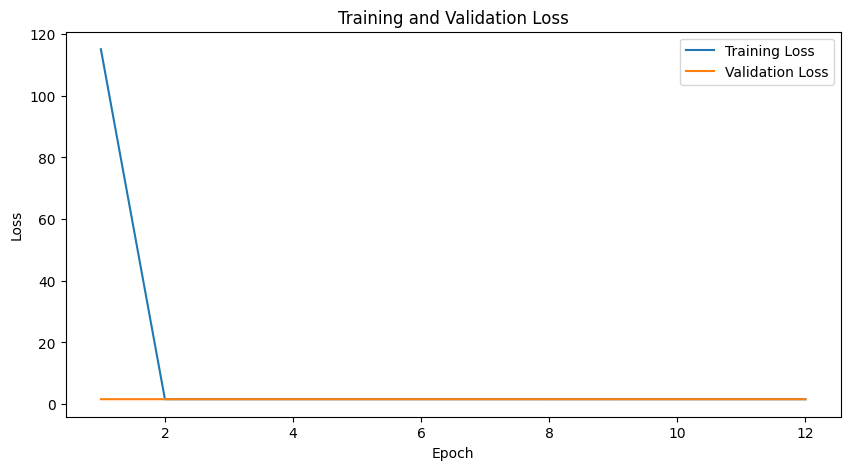

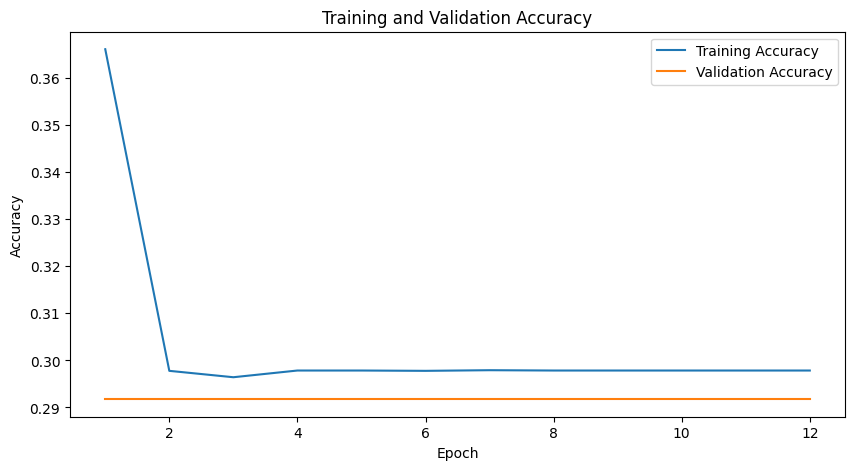


Training with batch size: 32, learning rate: 0.0001, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 0.777131874914283, Accuracy: 69.35%, Validation Loss: 0.4785151316812544, Validation Accuracy: 80.92%, Running time: 75.02207612991333
Epoch 2, Loss: 0.3777115791955248, Accuracy: 86.04%, Validation Loss: 0.2960525012546868, Validation Accuracy: 89.52%, Running time: 74.23029208183289
Epoch 3, Loss: 0.2587136113793951, Accuracy: 91.14%, Validation Loss: 0.2049949046393687, Validation Accuracy: 92.99%, Running time: 75.46464371681213
Epoch 4, Loss: 0.19532198335272372, Accuracy: 93.46%, Validation Loss: 0.22182071011400584, Validation Accuracy: 92.33%, Running time: 74.48918437957764
Epoch 6, Loss: 0.13179521205574435, Accuracy: 95.57%, Validation Loss: 0.16285775042717543, Validation Accuracy: 95.22%, Running time: 74.68544435501099
Epoch 7, Loss: 0.122040503610374, Accuracy: 95.87%, Validation Loss: 0.26697769591754134, Validation Accuracy: 91.57%, Running time: 75.03419899940491
Epoch 8, Loss: 0.09474642676252815, Accuracy: 96.84%, Validation Loss: 0.12231654808221554,

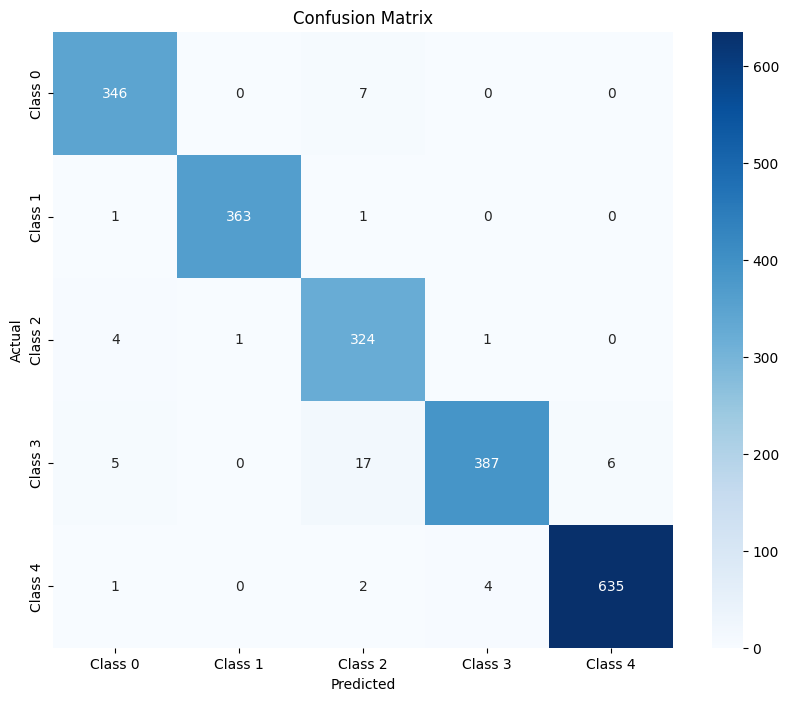

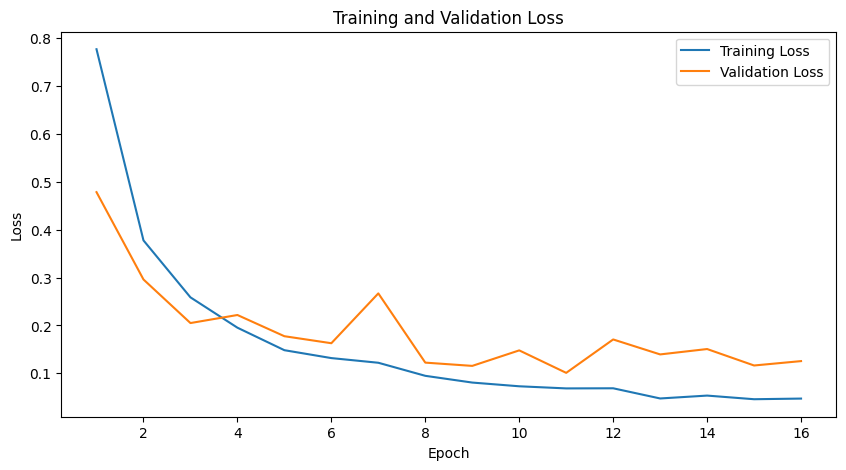

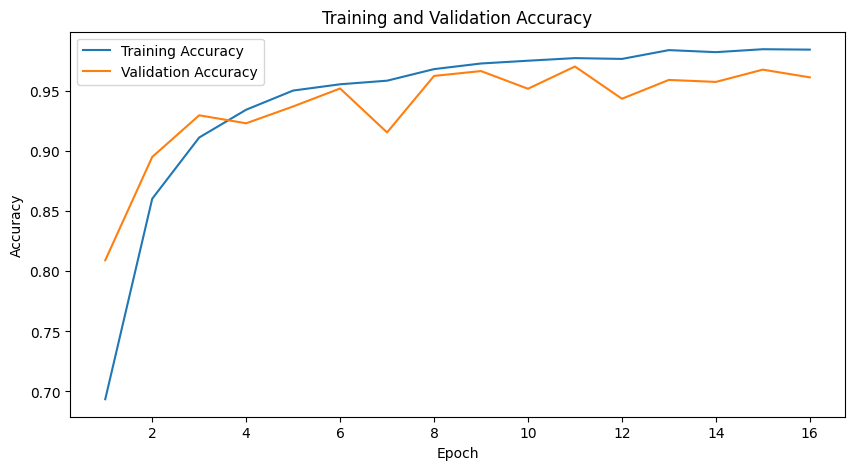


Training with batch size: 32, learning rate: 1e-05, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.090866400660248, Accuracy: 54.87%, Validation Loss: 0.7528078919558814, Validation Accuracy: 69.78%, Running time: 75.26625561714172
Epoch 2, Loss: 0.6520680013938995, Accuracy: 73.57%, Validation Loss: 0.5654931411598668, Validation Accuracy: 76.65%, Running time: 74.11447429656982
Epoch 3, Loss: 0.5119494818102511, Accuracy: 79.45%, Validation Loss: 0.4471266090192578, Validation Accuracy: 82.04%, Running time: 74.85133051872253
Epoch 4, Loss: 0.4231978774135387, Accuracy: 84.30%, Validation Loss: 0.36150094003162603, Validation Accuracy: 87.43%, Running time: 74.60093426704407
Epoch 5, Loss: 0.3513679560152672, Accuracy: 87.77%, Validation Loss: 0.3123891353607178, Validation Accuracy: 89.52%, Running time: 74.22156119346619
Epoch 6, Loss: 0.3034950649111235, Accuracy: 89.34%, Validation Loss: 0.3069835559775432, Validation Accuracy: 89.76%, Running time: 75.59559941291809
Epoch 7, Loss: 0.2775495723940416, Accuracy: 90.44%, Validation Loss: 0.2881801398188779, Vali

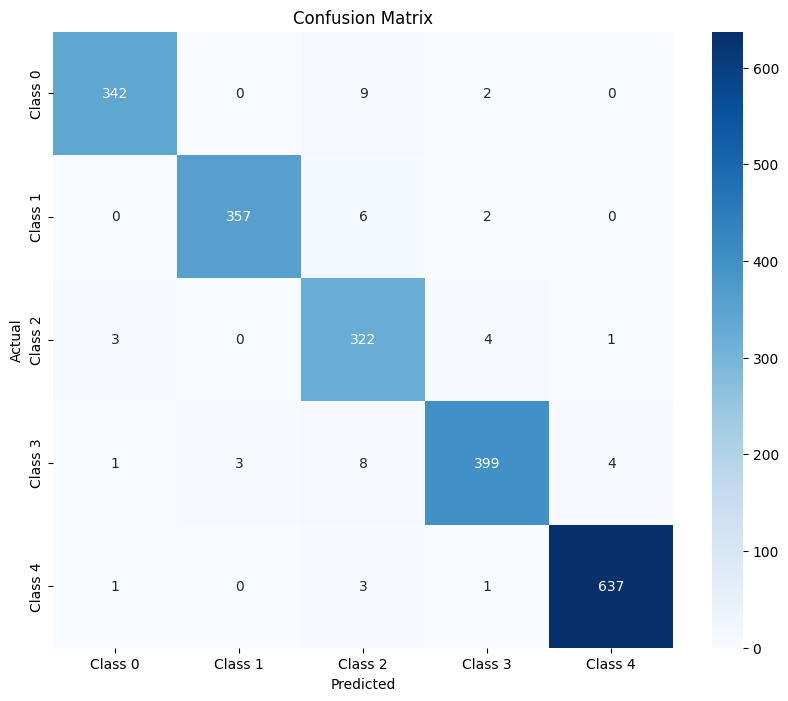

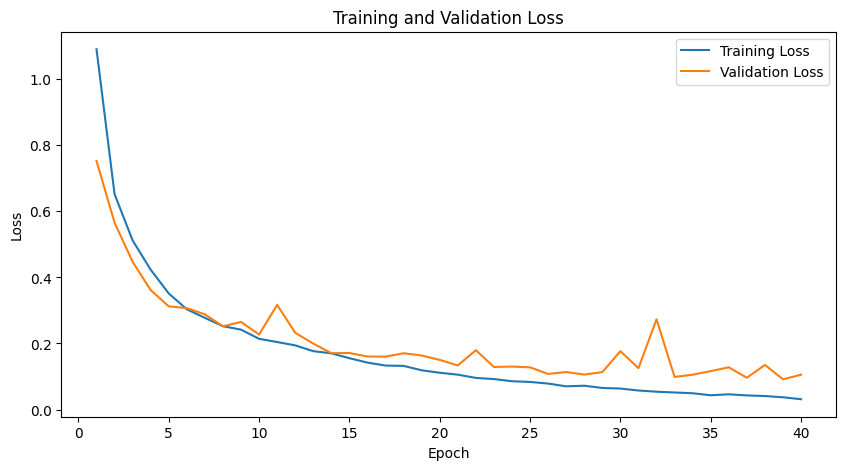

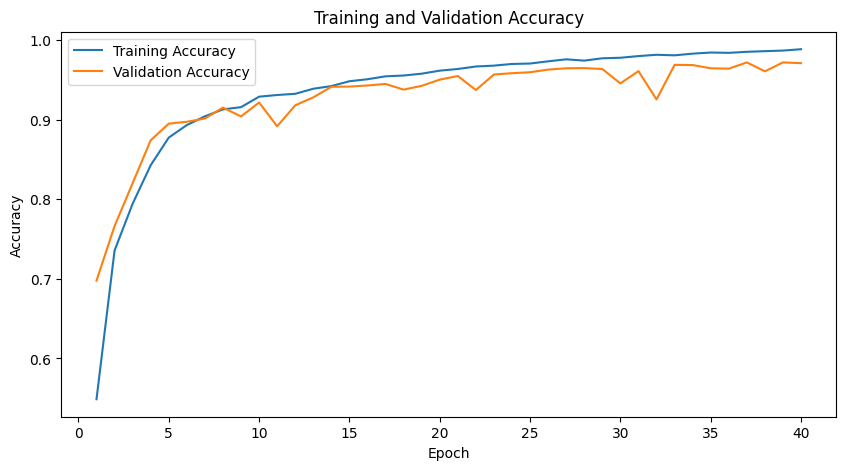


Training with batch size: 64, learning rate: 0.001, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.1319293642972972, Accuracy: 56.41%, Validation Loss: 1.1783291851029252, Validation Accuracy: 51.70%, Running time: 80.63733911514282
Epoch 2, Loss: 0.8006087980229101, Accuracy: 69.07%, Validation Loss: 0.7262087473363588, Validation Accuracy: 72.89%, Running time: 80.76961207389832
Epoch 3, Loss: 0.5895220770206286, Accuracy: 77.18%, Validation Loss: 0.5202027866334626, Validation Accuracy: 80.64%, Running time: 80.22468519210815
Epoch 4, Loss: 0.5054412813155682, Accuracy: 80.88%, Validation Loss: 0.477108280767094, Validation Accuracy: 82.97%, Running time: 79.56009435653687
Epoch 5, Loss: 0.4539093441003329, Accuracy: 82.89%, Validation Loss: 0.425963929431005, Validation Accuracy: 83.65%, Running time: 80.34607863426208
Epoch 6, Loss: 0.4531404300798456, Accuracy: 84.44%, Validation Loss: 0.5606943563078389, Validation Accuracy: 78.64%, Running time: 80.9968831539154
Epoch 7, Loss: 0.39521945632381356, Accuracy: 85.68%, Validation Loss: 0.3789774292346203, Valida

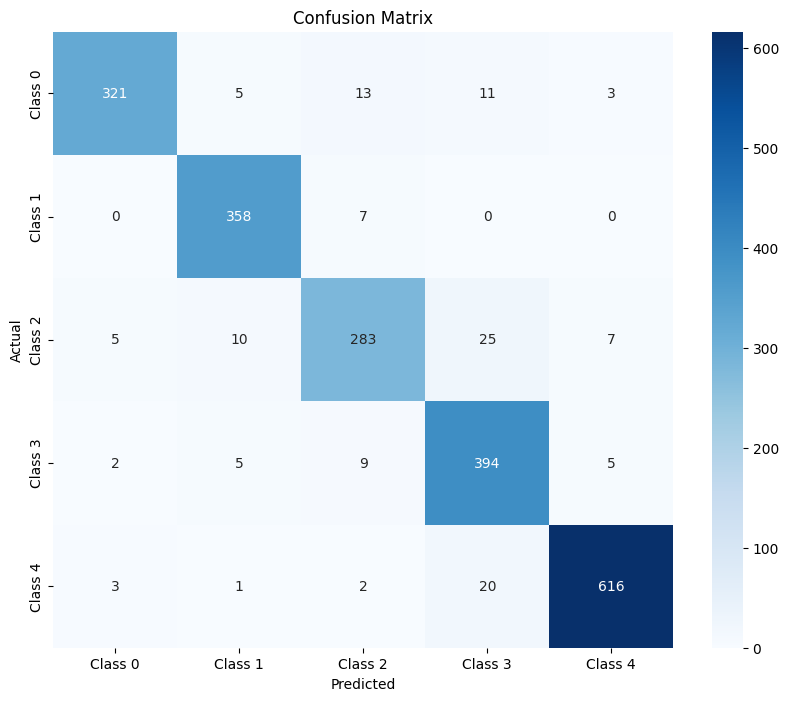

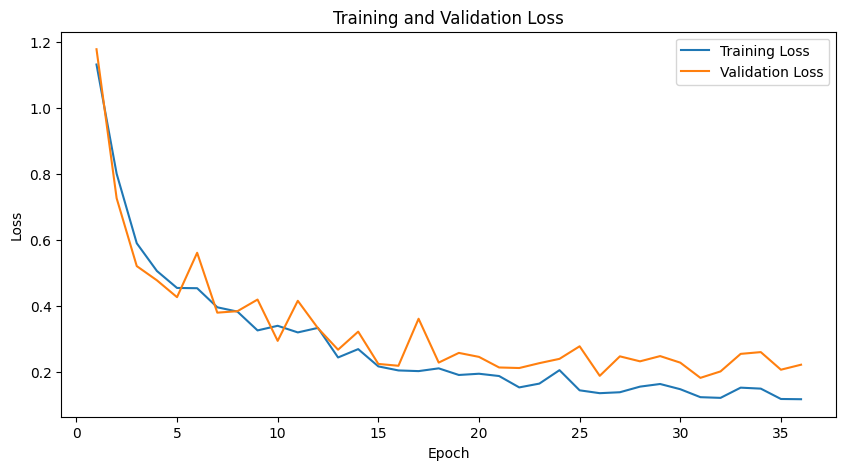

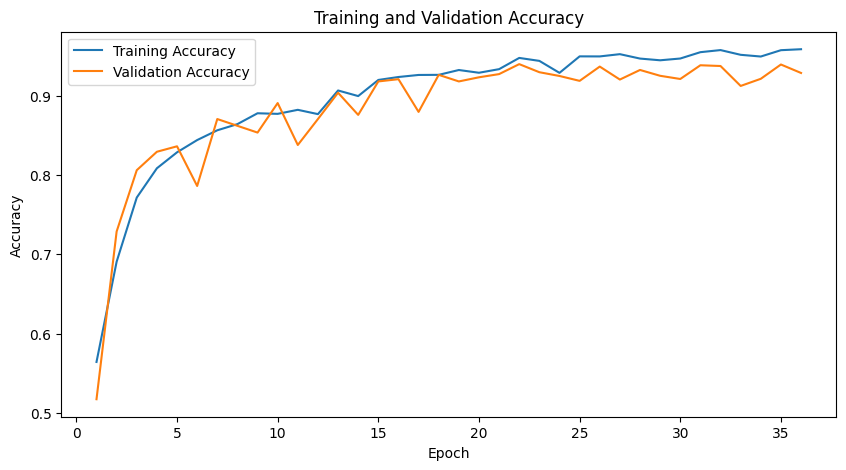


Training with batch size: 64, learning rate: 0.01, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 25778.10039186168, Accuracy: 29.44%, Validation Loss: 1.5844648498477358, Validation Accuracy: 29.18%, Running time: 79.47880458831787
Epoch 2, Loss: 1.5819787488871322, Accuracy: 29.79%, Validation Loss: 1.5836692542740793, Validation Accuracy: 29.18%, Running time: 79.41867518424988
Epoch 3, Loss: 1.5817260762829801, Accuracy: 29.79%, Validation Loss: 1.589714445851066, Validation Accuracy: 29.18%, Running time: 79.72157526016235
Epoch 4, Loss: 1.581322692173384, Accuracy: 29.79%, Validation Loss: 1.5852878202091565, Validation Accuracy: 29.18%, Running time: 79.6578996181488
Epoch 5, Loss: 1.5820061675397865, Accuracy: 29.79%, Validation Loss: 1.5865994511228618, Validation Accuracy: 29.18%, Running time: 79.57846713066101
Epoch 6, Loss: 1.5806796447539226, Accuracy: 29.79%, Validation Loss: 1.5857274315573953, Validation Accuracy: 29.18%, Running time: 78.78127861022949
Epoch 7, Loss: 1.5819596934628177, Accuracy: 29.79%, Validation Loss: 1.5839031392877752, Validati

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Batch Size: 64, Learning Rate: 0.01, Epochs: 40
Accuracy: 0.3049881235154394
Precision: 0.06099762470308788
Recall: 0.2
F1 Score: 0.09348380050964689

Confusion Matrix:


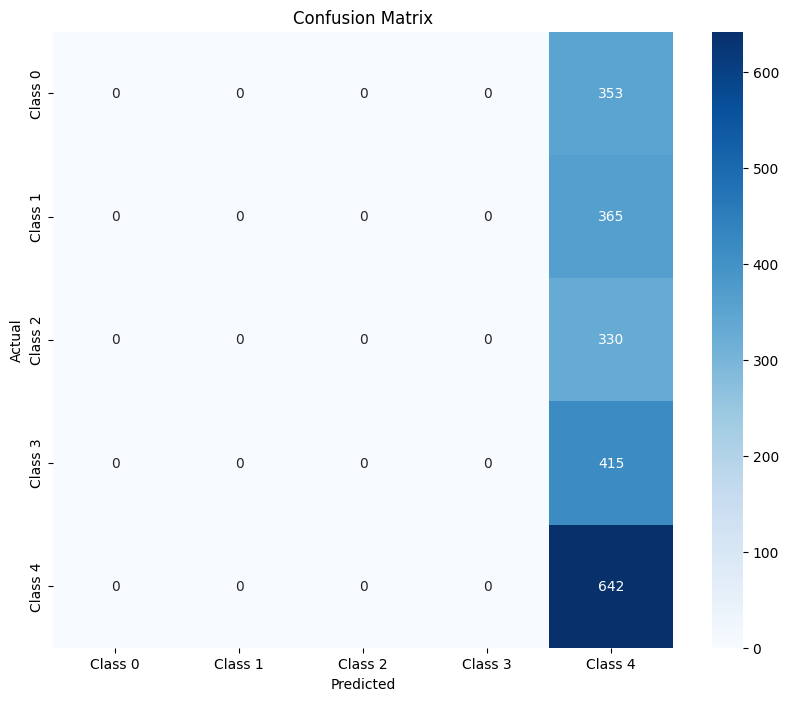

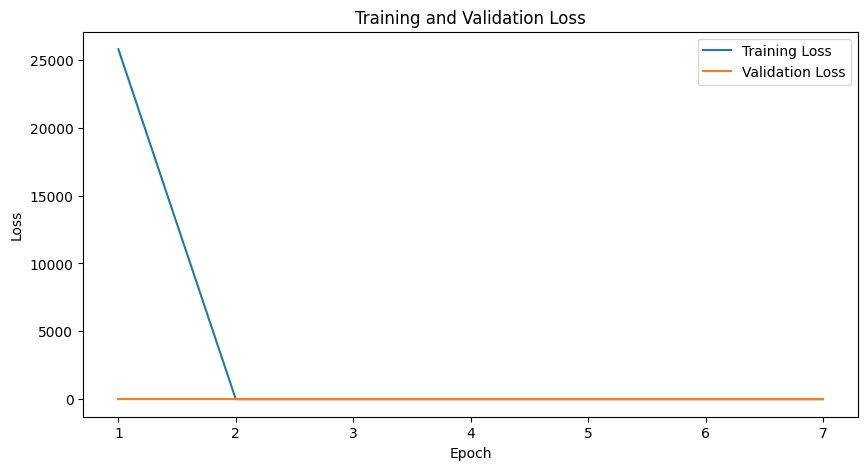

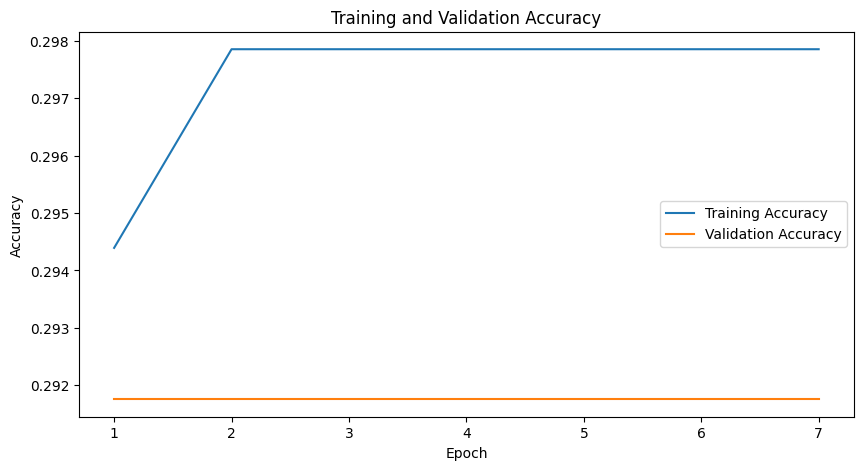


Training with batch size: 64, learning rate: 0.005, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 279.29390090858783, Accuracy: 47.39%, Validation Loss: 1.187621708169128, Validation Accuracy: 53.22%, Running time: 79.57104253768921
Epoch 2, Loss: 1.1754019312012247, Accuracy: 54.34%, Validation Loss: 1.1749655929478733, Validation Accuracy: 53.98%, Running time: 79.02034616470337
Epoch 3, Loss: 1.1647545491462146, Accuracy: 54.50%, Validation Loss: 1.144669425306898, Validation Accuracy: 54.24%, Running time: 79.18455338478088
Epoch 4, Loss: 1.1203002916786062, Accuracy: 56.17%, Validation Loss: 1.0484988725546636, Validation Accuracy: 57.59%, Running time: 79.30482745170593
Epoch 5, Loss: 1.0394069103451518, Accuracy: 59.07%, Validation Loss: 0.9763831920696028, Validation Accuracy: 61.06%, Running time: 79.241131067276
Epoch 6, Loss: 0.9435572642268557, Accuracy: 63.70%, Validation Loss: 1.000813623269399, Validation Accuracy: 62.96%, Running time: 79.6383273601532
Epoch 7, Loss: 1.1302275781507616, Accuracy: 55.78%, Validation Loss: 0.9906644270275579, Validation

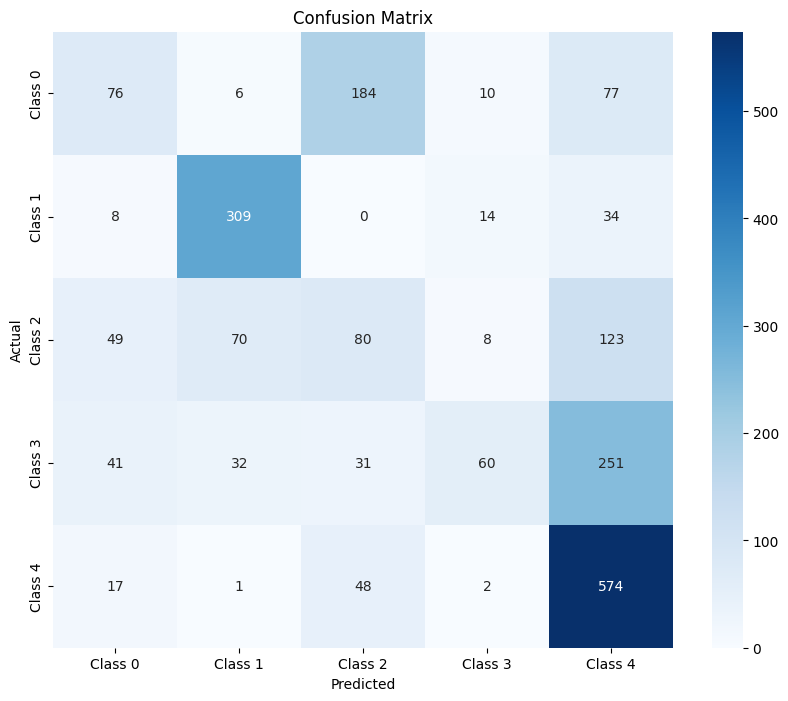

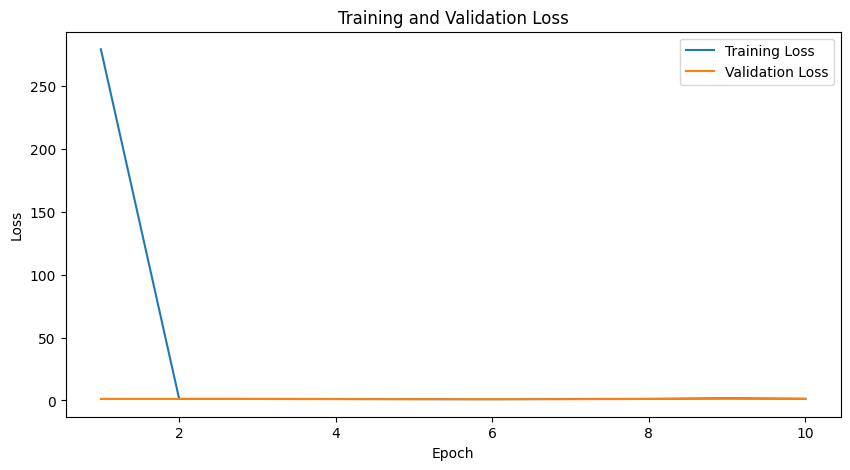

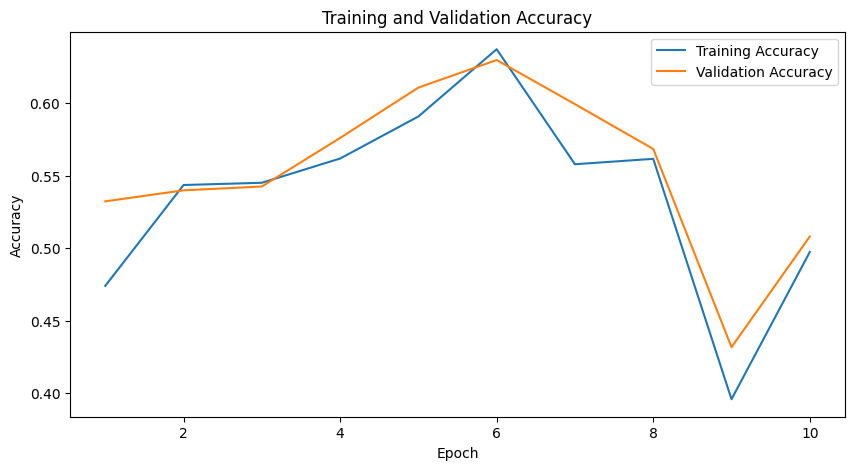


Training with batch size: 64, learning rate: 0.0001, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 0.8205222288767496, Accuracy: 67.28%, Validation Loss: 0.5028394532926155, Validation Accuracy: 79.97%, Running time: 79.56640028953552
Epoch 2, Loss: 0.42597122803265913, Accuracy: 83.76%, Validation Loss: 0.3231259220928857, Validation Accuracy: 89.17%, Running time: 78.87024998664856
Epoch 3, Loss: 0.281202989900525, Accuracy: 89.76%, Validation Loss: 0.20199218431882787, Validation Accuracy: 93.30%, Running time: 78.61366868019104
Epoch 4, Loss: 0.21107080523972904, Accuracy: 92.66%, Validation Loss: 0.21398698126502108, Validation Accuracy: 92.59%, Running time: 79.19312787055969
Epoch 5, Loss: 0.15080119030009875, Accuracy: 94.81%, Validation Loss: 0.19738901073508192, Validation Accuracy: 93.42%, Running time: 79.33994793891907
Epoch 6, Loss: 0.12502803792975423, Accuracy: 95.87%, Validation Loss: 0.13269155401962274, Validation Accuracy: 95.68%, Running time: 79.3577516078949
Epoch 7, Loss: 0.11959488561691402, Accuracy: 95.83%, Validation Loss: 0.309693428490198

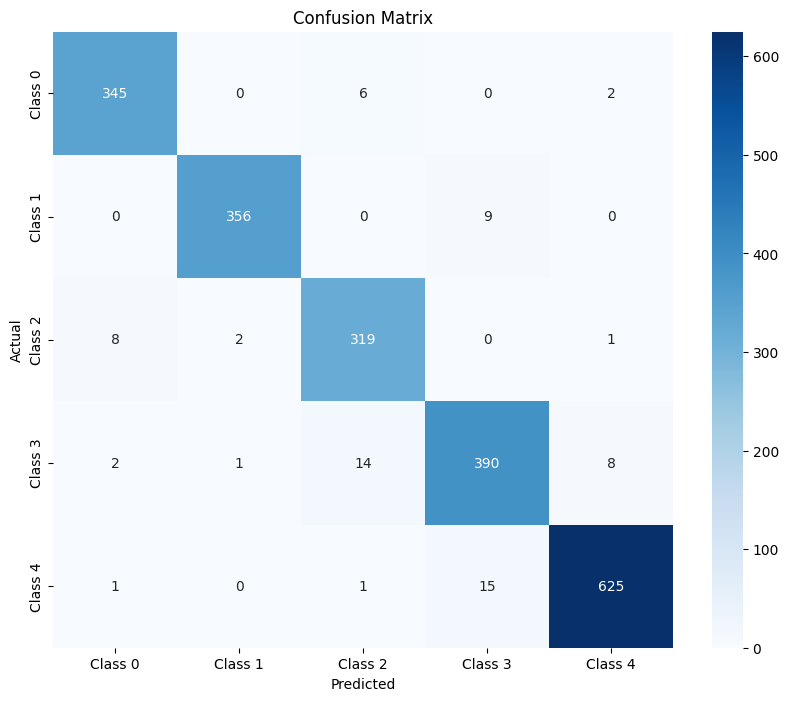

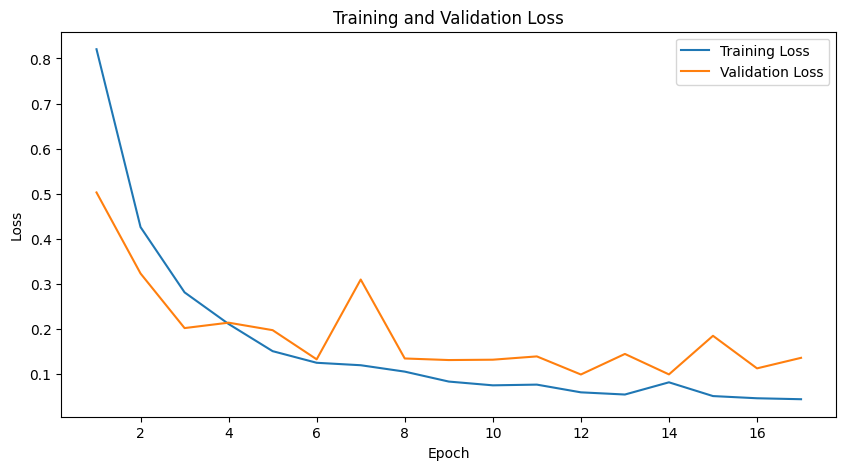

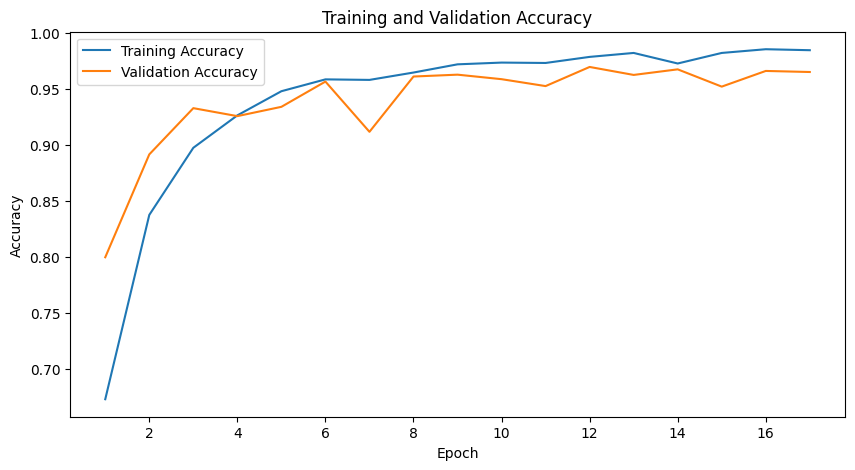


Training with batch size: 64, learning rate: 1e-05, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.202327325230553, Accuracy: 49.92%, Validation Loss: 1.003227589708386, Validation Accuracy: 63.58%, Running time: 116.64913010597229
Epoch 2, Loss: 0.7870383487119303, Accuracy: 68.70%, Validation Loss: 0.6918438578193838, Validation Accuracy: 71.89%, Running time: 86.01984405517578
Epoch 3, Loss: 0.6389181967421528, Accuracy: 74.03%, Validation Loss: 0.5827920089165369, Validation Accuracy: 76.50%, Running time: 79.23535346984863
Epoch 4, Loss: 0.5482529052150198, Accuracy: 77.57%, Validation Loss: 0.488087895693201, Validation Accuracy: 80.90%, Running time: 79.34903120994568
Epoch 5, Loss: 0.47488093979301904, Accuracy: 81.45%, Validation Loss: 0.43400606309825723, Validation Accuracy: 83.49%, Running time: 78.95348715782166
Epoch 6, Loss: 0.4037283675108121, Accuracy: 84.93%, Validation Loss: 0.4081339734521779, Validation Accuracy: 85.70%, Running time: 78.31508708000183
Epoch 7, Loss: 0.37318023387745863, Accuracy: 86.59%, Validation Loss: 0.38563145313299063, Va

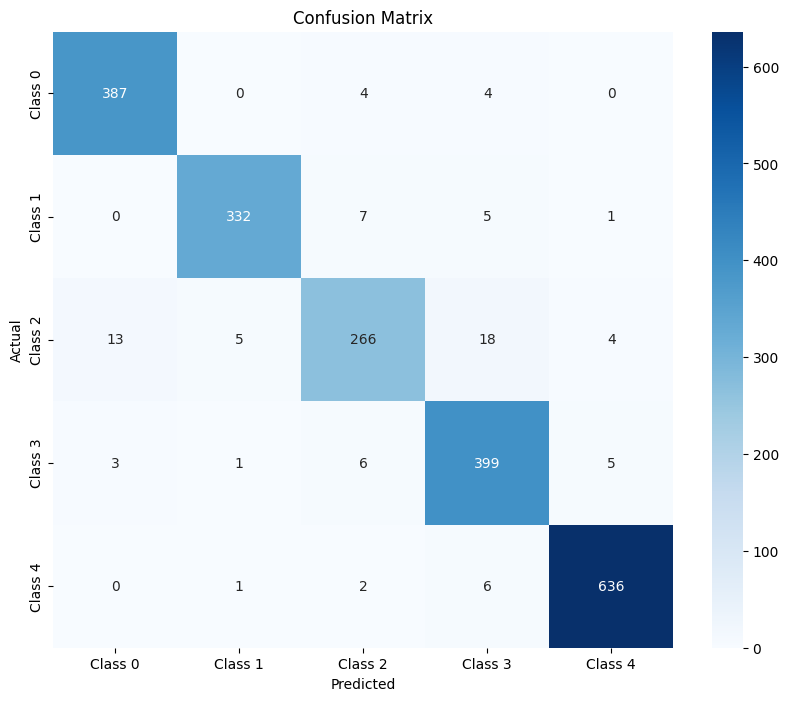

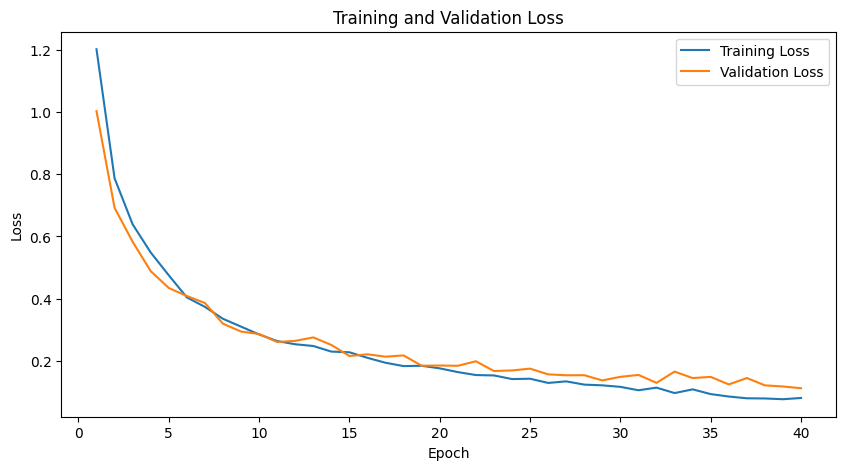

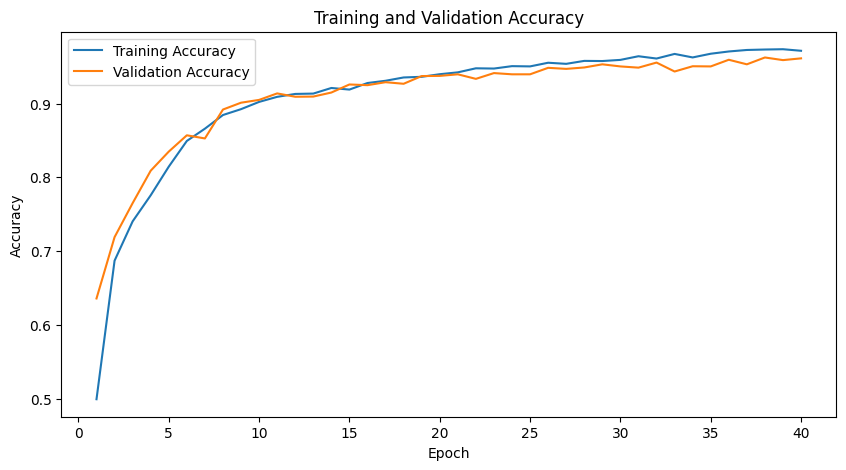

Training with batch size: 120, learning rate: 0.001, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.3366700299387055, Accuracy: 50.50%, Validation Loss: 0.9639271712965436, Validation Accuracy: 65.31%, Running time: 111.97689628601074
Epoch 2, Loss: 0.7441154914658245, Accuracy: 71.48%, Validation Loss: 0.5445578934417831, Validation Accuracy: 79.73%, Running time: 84.47509145736694
Epoch 3, Loss: 0.5540157614684686, Accuracy: 79.47%, Validation Loss: 0.44820360839366913, Validation Accuracy: 83.46%, Running time: 76.12812113761902
Epoch 4, Loss: 0.4394155223437441, Accuracy: 83.74%, Validation Loss: 0.4142737595571412, Validation Accuracy: 85.34%, Running time: 74.93556714057922
Epoch 5, Loss: 0.3442915841573622, Accuracy: 87.27%, Validation Loss: 0.29633150197979474, Validation Accuracy: 90.09%, Running time: 84.23960328102112
Epoch 6, Loss: 0.31359576585331583, Accuracy: 88.79%, Validation Loss: 0.4015169305106004, Validation Accuracy: 85.25%, Running time: 78.21459317207336
Epoch 7, Loss: 0.2864119878750506, Accuracy: 89.72%, Validation Loss: 0.2590159508917067, 

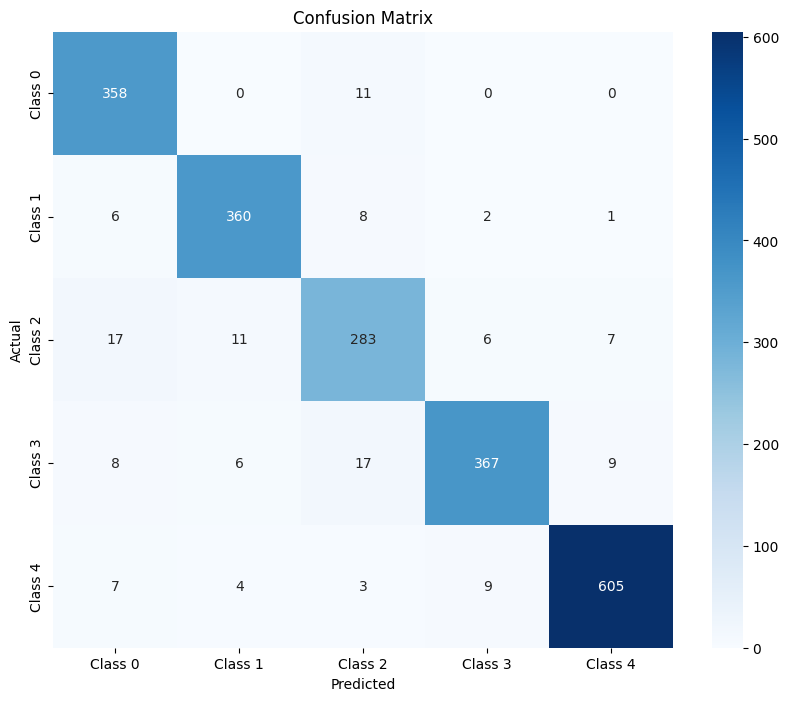

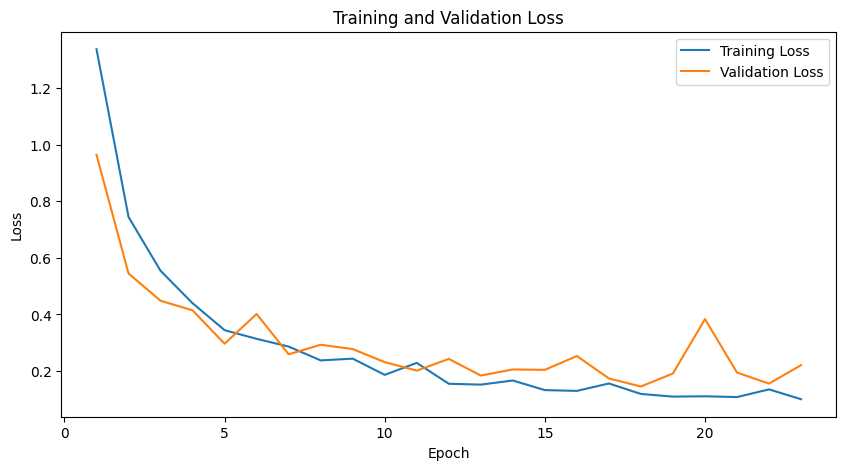

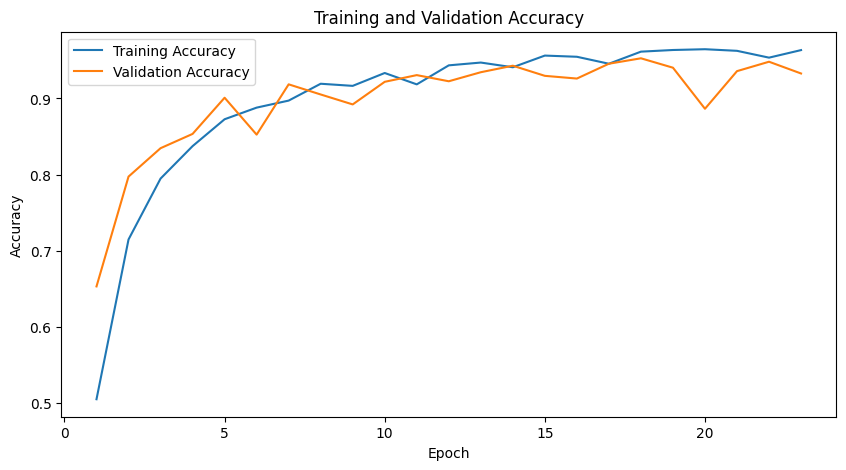


Training with batch size: 120, learning rate: 0.01, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 161677.28750664045, Accuracy: 27.13%, Validation Loss: 1.5800586508380041, Validation Accuracy: 30.43%, Running time: 71.81469225883484
Epoch 2, Loss: 2.2654974712588922, Accuracy: 29.21%, Validation Loss: 1.61069052418073, Validation Accuracy: 30.43%, Running time: 75.35548138618469
Epoch 3, Loss: 1.5954552646574935, Accuracy: 29.16%, Validation Loss: 1.5819923347897, Validation Accuracy: 30.43%, Running time: 76.7080819606781
Epoch 4, Loss: 1.6032520668293402, Accuracy: 28.44%, Validation Loss: 1.593254394001431, Validation Accuracy: 30.43%, Running time: 76.07483291625977
Epoch 5, Loss: 1.5860363700525548, Accuracy: 29.47%, Validation Loss: 1.5778087344434526, Validation Accuracy: 30.43%, Running time: 76.60812640190125
Epoch 6, Loss: 1.582828649660436, Accuracy: 29.52%, Validation Loss: 1.5771417650911543, Validation Accuracy: 30.43%, Running time: 76.75499320030212
Epoch 7, Loss: 1.5829459390019982, Accuracy: 29.52%, Validation Loss: 1.5778814885351393, Validation A

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Batch Size: 120, Learning Rate: 0.01, Epochs: 40
Accuracy: 0.29833729216152016
Precision: 0.05966745843230403
Recall: 0.2
F1 Score: 0.09191364800585437

Confusion Matrix:


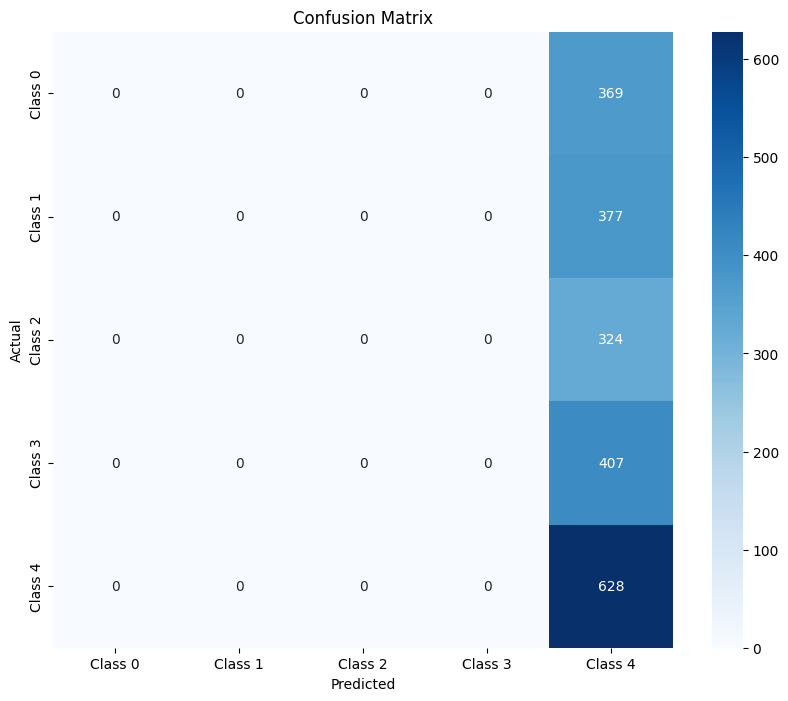

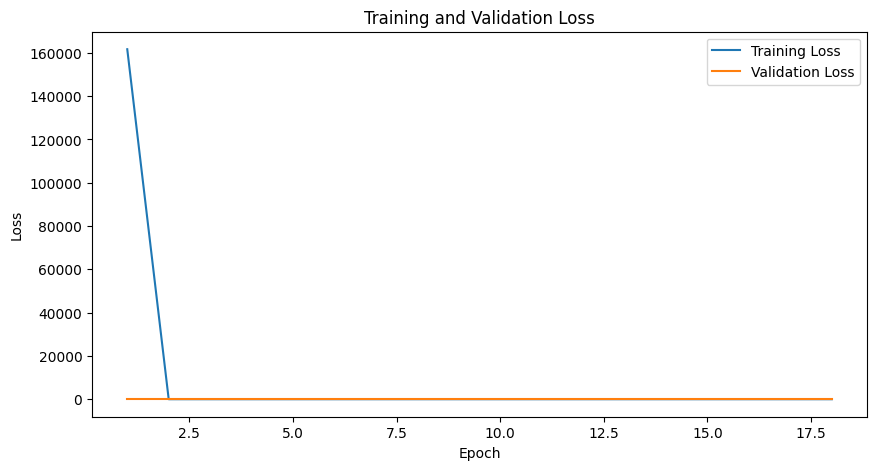

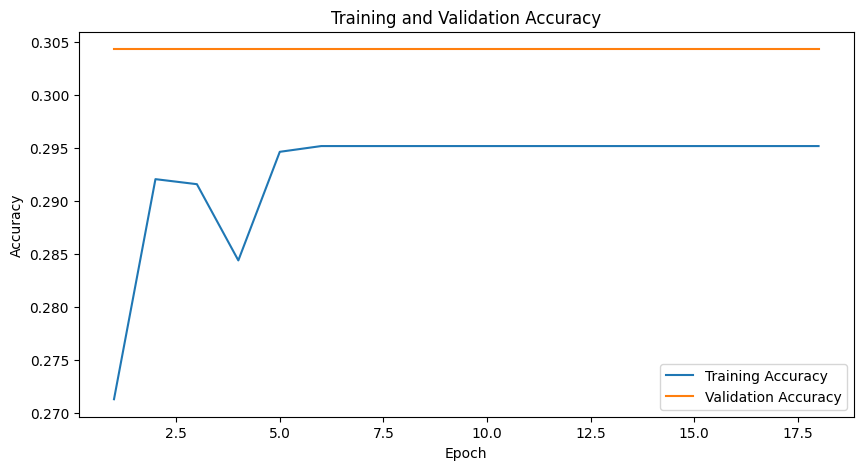


Training with batch size: 120, learning rate: 0.005, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 557.6612969821061, Accuracy: 41.56%, Validation Loss: 1.2063763704564836, Validation Accuracy: 52.32%, Running time: 75.63652658462524
Epoch 2, Loss: 12.352479457855225, Accuracy: 45.89%, Validation Loss: 1.5813022885057662, Validation Accuracy: 30.43%, Running time: 75.64749193191528
Epoch 3, Loss: 1.5872920896948837, Accuracy: 29.15%, Validation Loss: 1.5787564582294888, Validation Accuracy: 30.43%, Running time: 75.63619542121887
Epoch 4, Loss: 1.584346635554864, Accuracy: 29.51%, Validation Loss: 1.5778824554549322, Validation Accuracy: 30.43%, Running time: 75.7315001487732
Epoch 5, Loss: 1.5849926869074504, Accuracy: 29.47%, Validation Loss: 1.5795565578672621, Validation Accuracy: 30.43%, Running time: 76.27908158302307
Epoch 6, Loss: 1.582716236269571, Accuracy: 29.52%, Validation Loss: 1.5777444077862635, Validation Accuracy: 30.43%, Running time: 74.8665418624878
Early stopping!
Training stopped due to early stopping.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Batch Size: 120, Learning Rate: 0.005, Epochs: 40
Accuracy: 0.29833729216152016
Precision: 0.05966745843230403
Recall: 0.2
F1 Score: 0.09191364800585437

Confusion Matrix:


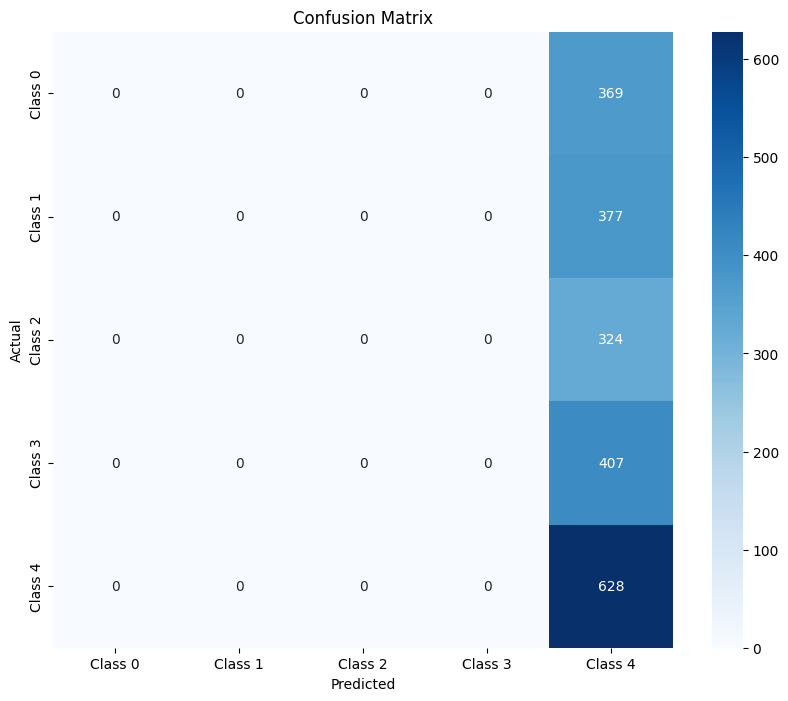

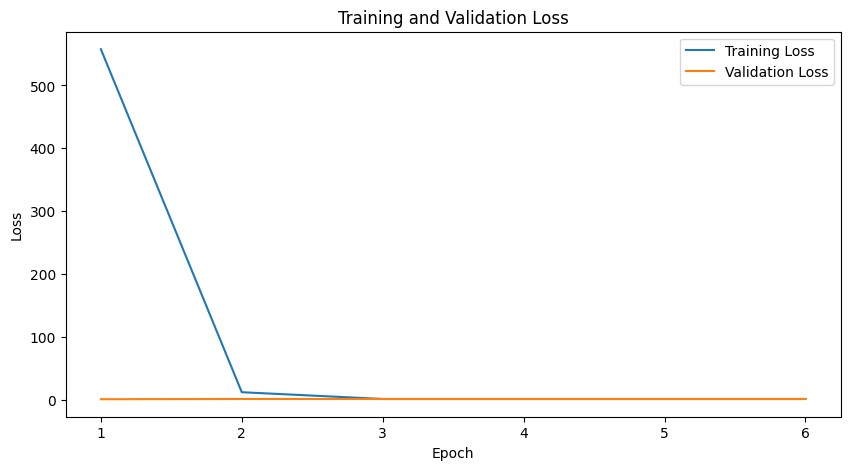

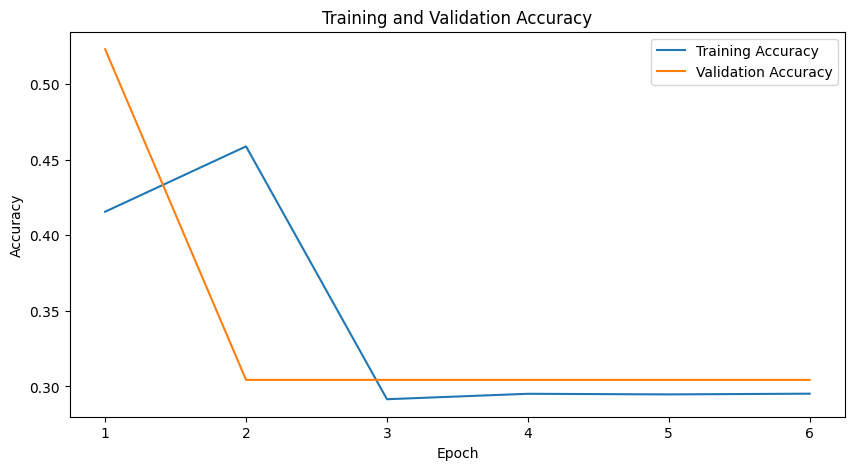


Training with batch size: 120, learning rate: 0.0001, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 0.9445165536267971, Accuracy: 61.21%, Validation Loss: 0.5828672846158346, Validation Accuracy: 77.79%, Running time: 74.69571185112
Epoch 2, Loss: 0.5124475088545947, Accuracy: 80.02%, Validation Loss: 0.3620835997992092, Validation Accuracy: 86.46%, Running time: 76.41028046607971
Epoch 3, Loss: 0.31807448696799395, Accuracy: 88.76%, Validation Loss: 0.22453812804693976, Validation Accuracy: 91.87%, Running time: 76.1900839805603
Epoch 4, Loss: 0.2577574277917544, Accuracy: 91.20%, Validation Loss: 0.3076789453625679, Validation Accuracy: 88.95%, Running time: 75.16489219665527
Epoch 5, Loss: 0.19177780082313026, Accuracy: 93.40%, Validation Loss: 0.2193436250090599, Validation Accuracy: 92.56%, Running time: 76.07402324676514
Epoch 6, Loss: 0.155410617438516, Accuracy: 94.67%, Validation Loss: 0.1507809493276808, Validation Accuracy: 94.89%, Running time: 76.01583051681519
Epoch 7, Loss: 0.13121024401086132, Accuracy: 95.66%, Validation Loss: 0.15708066078109872, Vali

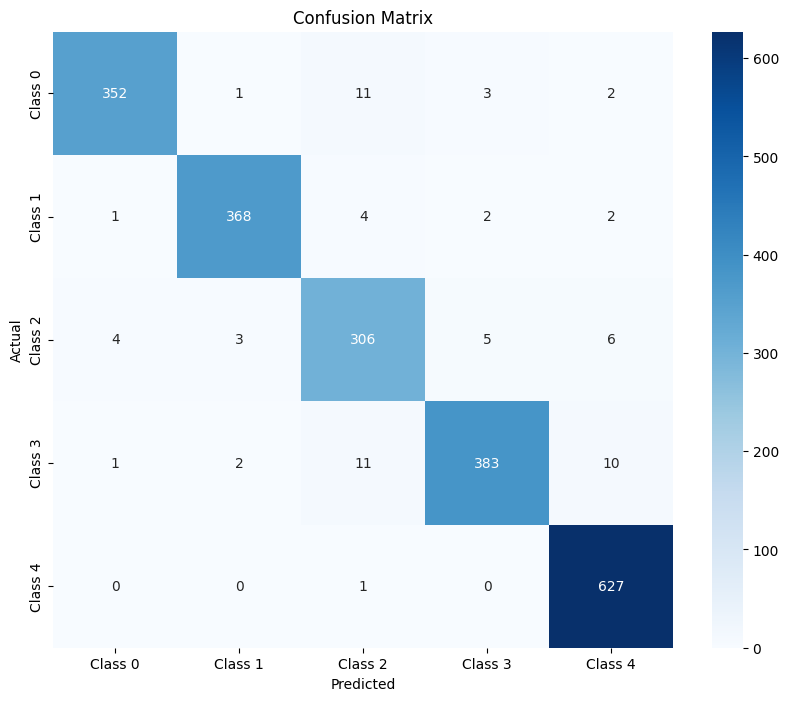

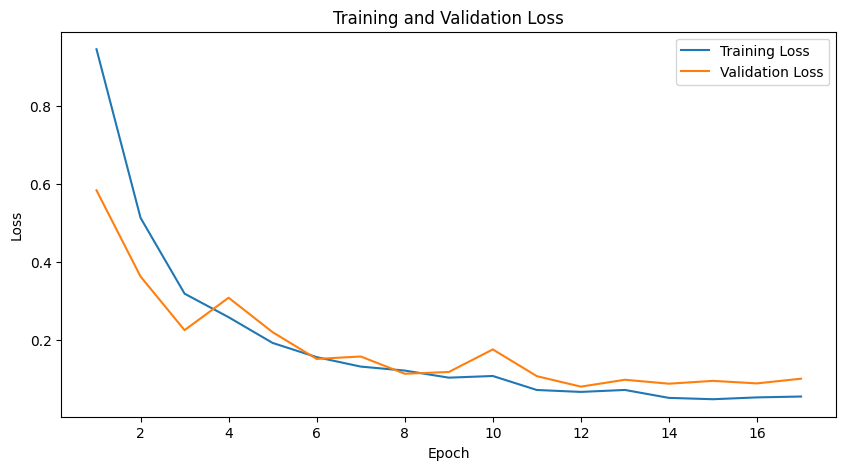

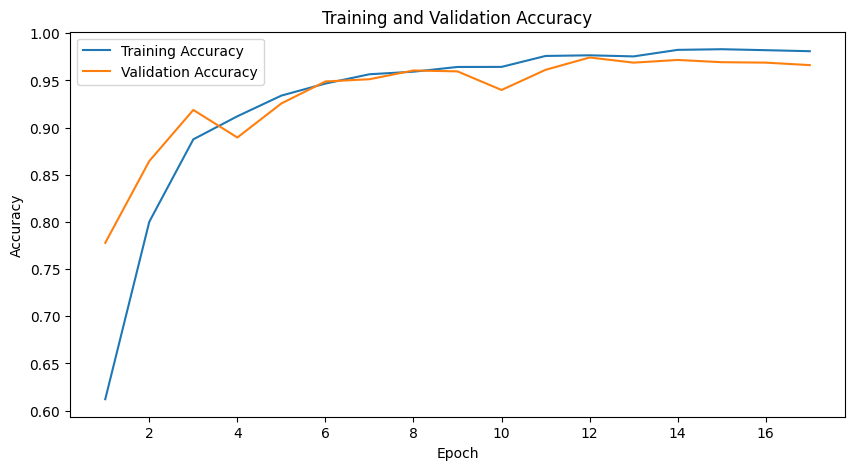


Training with batch size: 120, learning rate: 1e-05, and epochs: 40


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1, Loss: 1.3127093518652566, Accuracy: 44.02%, Validation Loss: 1.0819908645417955, Validation Accuracy: 56.28%, Running time: 76.71308827400208
Epoch 2, Loss: 0.9235215119230069, Accuracy: 63.67%, Validation Loss: 0.8039738916688495, Validation Accuracy: 68.52%, Running time: 74.72901058197021
Epoch 3, Loss: 0.7188586006319619, Accuracy: 71.17%, Validation Loss: 0.6770169056124158, Validation Accuracy: 73.51%, Running time: 76.16401624679565
Epoch 4, Loss: 0.61488908044691, Accuracy: 75.24%, Validation Loss: 0.5987644344568253, Validation Accuracy: 75.60%, Running time: 75.92463755607605
Epoch 5, Loss: 0.5435022711753845, Accuracy: 78.22%, Validation Loss: 0.4988417898615201, Validation Accuracy: 80.54%, Running time: 75.7944540977478
Epoch 6, Loss: 0.4770999015346775, Accuracy: 80.91%, Validation Loss: 0.47133327689435744, Validation Accuracy: 81.80%, Running time: 75.40919709205627
Epoch 7, Loss: 0.42932013949243036, Accuracy: 83.36%, Validation Loss: 0.4012785835398568, Valid

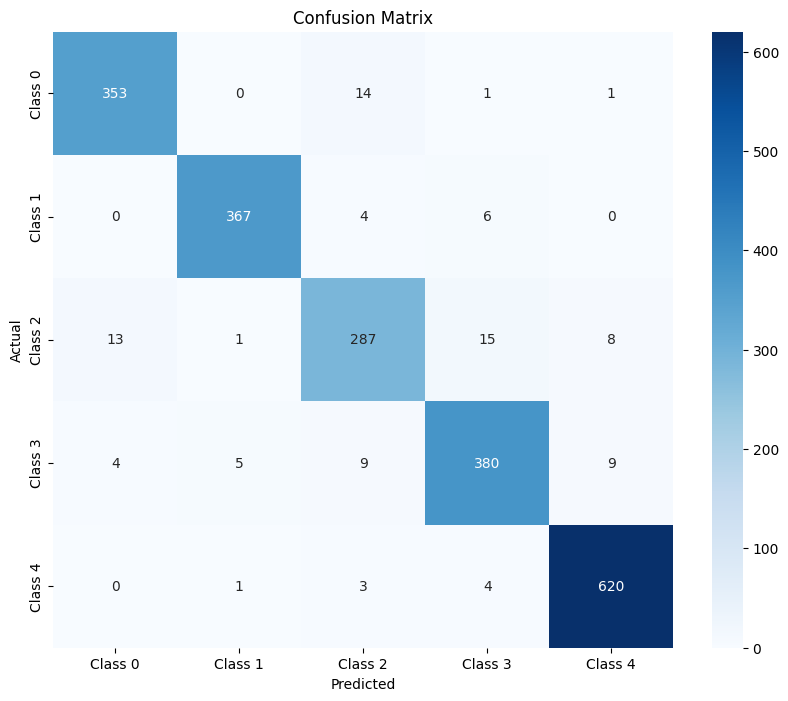

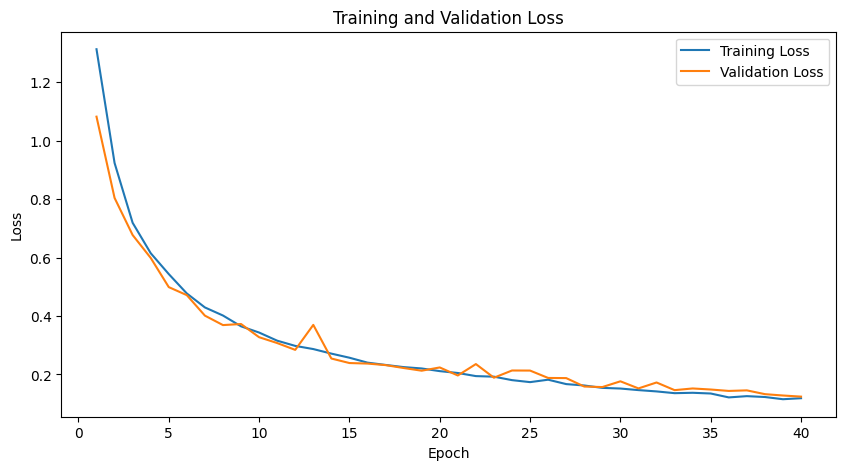

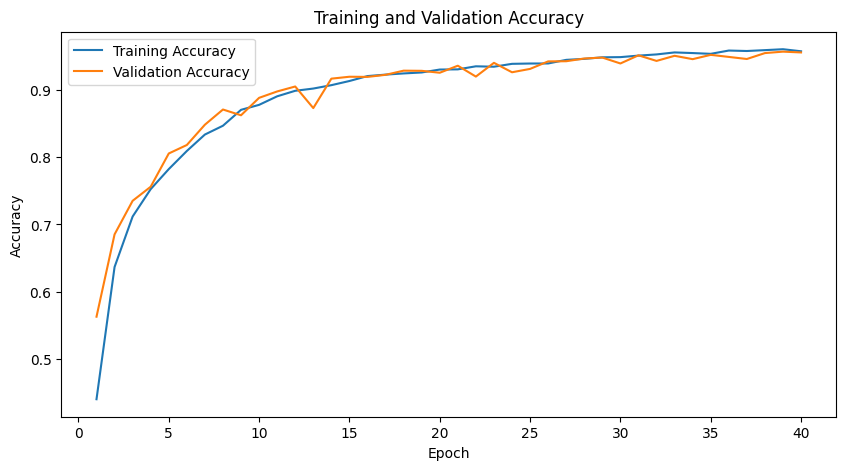

In [ ]:
for batch_size in batch_size_range:
  for learning_rate in learning_rate_range:
    num_epochs = 40
    print(f"Training with batch size: {batch_size}, learning rate: {learning_rate}, and epochs: {num_epochs}")
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    model = models.alexnet(pretrained=False)
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, 5)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    loss_during_epoch = []
    accuracy_during_epoch = []

    patience = 5
    best_valid_loss = float('inf')
    epochs_no_improve = 0
    early_stopping = False

    train_loss_list = []
    train_accuracy_list = []
    valid_loss_list = []
    valid_accuracy_list = []

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in train_loader:
            # Your existing training code...
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)


        # Validation
        model.eval()
        valid_loss = 0.0
        valid_correct_predictions = 0
        valid_total_predictions = 0

        with torch.no_grad():
            for valid_inputs, valid_labels in valid_loader:
                valid_inputs, valid_labels = valid_inputs.to(device), valid_labels.to(device)
                valid_outputs = model(valid_inputs)
                valid_loss += criterion(valid_outputs, valid_labels).item()

                _, valid_predicted = torch.max(valid_outputs, 1)
                valid_correct_predictions += (valid_predicted == valid_labels).sum().item()
                valid_total_predictions += valid_labels.size(0)


        end_time = time.time()
        elapsed_time = end_time - start_time

        # Calculate metrics
        train_loss = running_loss / len(train_loader)
        train_accuracy = correct_predictions / total_predictions
        valid_loss = valid_loss / len(valid_loader)
        valid_accuracy = valid_correct_predictions / valid_total_predictions

        # Append to lists
        train_loss_list.append(train_loss)
        train_accuracy_list.append(train_accuracy)
        valid_loss_list.append(valid_loss)
        valid_accuracy_list.append(valid_accuracy)

        print(f"Epoch {epoch+1}, Loss: {train_loss}, Accuracy: {train_accuracy * 100:.2f}%, "
              f"Validation Loss: {valid_loss}, Validation Accuracy: {valid_accuracy * 100:.2f}%, "
              f"Running time: {elapsed_time}")

        # Early stopping logic
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping!")
                early_stopping = True
                break

    # After the loop, you can check if early stopping occurred
    if early_stopping:
        print("Training stopped due to early stopping.")
    else:
        print("Training completed all epochs.")

    torch.save(model.state_dict(), f'RSI-CB_alexnet{batch_size}_lr_{learning_rate}_epochs_{num_epochs}.pth')

    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    print()
    print(f"Batch Size: {batch_size}, Learning Rate: {learning_rate}, Epochs: {num_epochs}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    print()
    print("Confusion Matrix:")
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(len(cm))], yticklabels=[f'Class {i}' for i in range(len(cm))])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Determine the actual number of epochs recorded
    num_epochs = len(train_loss_list)

    print()
    # Plotting training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_loss_list, label='Training Loss')
    plt.plot(range(1, num_epochs + 1), valid_loss_list, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print()
    # Plotting training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), valid_accuracy_list, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    print()